In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv("city_day.csv")
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
#Finding missing values in the data set 
total = df.isnull().sum()[df.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(df)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing', 'percent'])

,total_missing,percent
Xylene,18109,61.32
PM10,11140,37.72
NH3,10328,34.97
Toluene,8041,27.23
Benzene,5623,19.04
AQI_Bucket,4681,15.85
AQI,4681,15.85
PM2.5,4598,15.57
NOx,4185,14.17
O3,4022,13.62


In [4]:
#def remove_outlier(df, O3):
    q1 = df[O3].quantile(0.25)
    q3 = df[O3].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    dff = df.loc[(df[O3] > fence_low) & (df[O3] < fence_high)]
    return dff

remove_outlier(df,'CO')
remove_outlier(df,'NO')
remove_outlier(df,'NO2')
remove_outlier(df,'SO2')
remove_outlier(df,'O3')
remove_outlier(df,'NOx')
remove_outlier(df,'PM2.5')
remove_outlier(df,'Benzene')
df

IndentationError: unexpected indent (<ipython-input-4-b7daa4ef20a4>, line 2)

In [5]:
by_State=df.groupby('City')

def impute_mean(series):
    return series.fillna(series.mean())

df['CO']=by_State['CO'].transform(impute_mean)
df['NO']=by_State['NO'].transform(impute_mean)
df['NO2']=by_State['NO2'].transform(impute_mean)
df['SO2']=by_State['SO2'].transform(impute_mean)
df['O3']=by_State['O3'].transform(impute_mean)
df['NOx']=by_State['NOx'].transform(impute_mean)
df['PM2.5']=by_State['PM2.5'].transform(impute_mean)
df['Benzene']=by_State['Benzene'].transform(impute_mean)

In [6]:
#Missing values being filled in columns
for col in df.columns.values:
    if df[col].isnull().sum() == 0:
        continue
    elif col == 'Date':
        guess_values = df.groupby('City')['Date'].apply(lambda x: x.mode().max())

df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.854497,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,67.854497,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,67.854497,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,67.854497,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,67.854497,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [7]:
df.info() 
#pm2.5,no,no2,co,so2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       29531 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          29531 non-null  float64
 5   NO2         29531 non-null  float64
 6   NOx         28362 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          29531 non-null  float64
 9   SO2         29531 non-null  float64
 10  O3          29369 non-null  float64
 11  Benzene     26799 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [8]:
df1=df.drop(['NH3','NOx','PM10','Benzene','Toluene', 'Xylene','AQI_Bucket'],axis=1)
df1

,City,Date,PM2.5,NO,NO2,CO,SO2,O3,AQI
0,Ahmedabad,2015-01-01,67.854497,0.92,18.22,0.92,27.64,133.36,NaN
1,Ahmedabad,2015-01-02,67.854497,0.97,15.69,0.97,24.55,34.06,NaN
2,Ahmedabad,2015-01-03,67.854497,17.40,19.30,17.40,29.07,30.70,NaN
3,Ahmedabad,2015-01-04,67.854497,1.70,18.48,1.70,18.59,36.08,NaN
4,Ahmedabad,2015-01-05,67.854497,22.10,21.42,22.10,39.33,39.31,NaN
...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,7.68,25.06,0.47,8.55,23.30,41.0
29527,Visakhapatnam,2020-06-28,24.380000,3.42,26.06,0.52,12.72,30.14,70.0
29528,Visakhapatnam,2020-06-29,22.910000,3.45,29.53,0.48,8.42,30.96,68.0
29529,Visakhapatnam,2020-06-30,16.640000,4.05,29.26,0.52,9.84,28.30,54.0


In [9]:
df1.isnull().sum()

City        0
Date        0
PM2.5       0
NO          0
NO2         0
CO          0
SO2         0
O3        162
AQI      4681
dtype: int64

In [10]:
# Drop rows with NaN values
df1 = df1.dropna() 
df1 = df1.reset_index() # reset's row indexes in case any rows were dropped
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24697 entries, 0 to 24696
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   24697 non-null  int64  
 1   City    24697 non-null  object 
 2   Date    24697 non-null  object 
 3   PM2.5   24697 non-null  float64
 4   NO      24697 non-null  float64
 5   NO2     24697 non-null  float64
 6   CO      24697 non-null  float64
 7   SO2     24697 non-null  float64
 8   O3      24697 non-null  float64
 9   AQI     24697 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 1.9+ MB


In [11]:
df1.to_csv('Clean_data.csv', index=False)

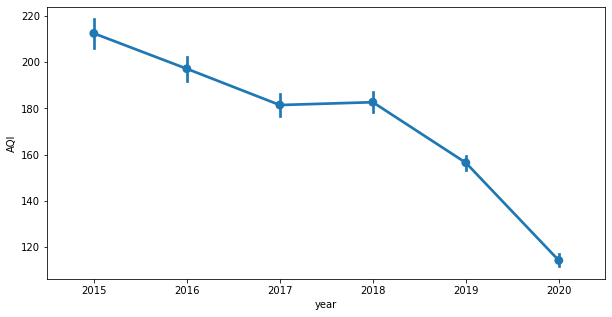

In [126]:
import matplotlib.pyplot as plt
df1['Date'] = pd.to_datetime(df1['Date'],format='%Y-%m-%d') # date parse
df1['year'] = df1['Date'].dt.year # year
df1['year'] = df1['year'].fillna(0.0).astype(int)
df1 = df1[(df1['year']>0)]

dff = df1[['AQI','year','City']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(10,5))
sns.pointplot(x='year', y='AQI', data=df1)

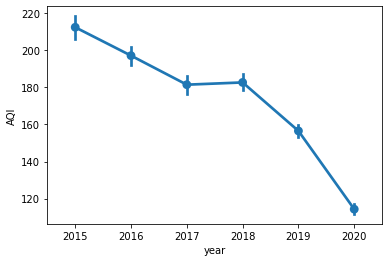

In [130]:
df1['Date'] = pd.to_datetime(df1['Date'],format='%Y-%m-%d') # date parse
df1['year'] = df1['Date'].dt.year # year

sns.pointplot(x='year', y='AQI', data=df1)

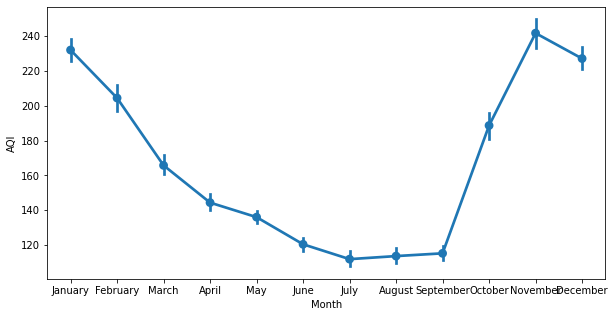

In [169]:
df1['Month'] = df1['Date'].dt.month_name() # week
f,ax=plt.subplots(figsize=(10,5))
sns.pointplot(x='Month', y='AQI', data=df1)

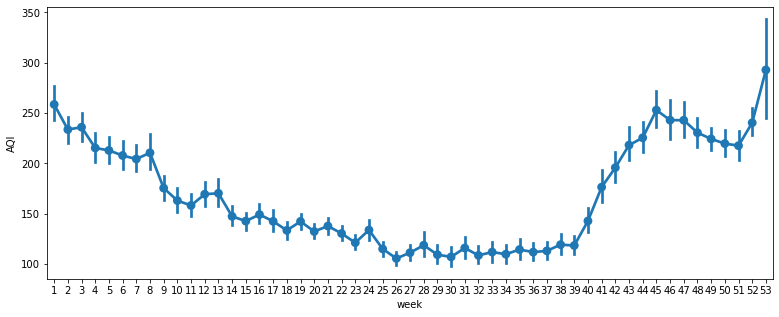

In [141]:
df1['week'] = df1['Date'].dt.week # week
f,ax=plt.subplots(figsize=(13,5))
sns.pointplot(x='week', y='AQI', data=df1)

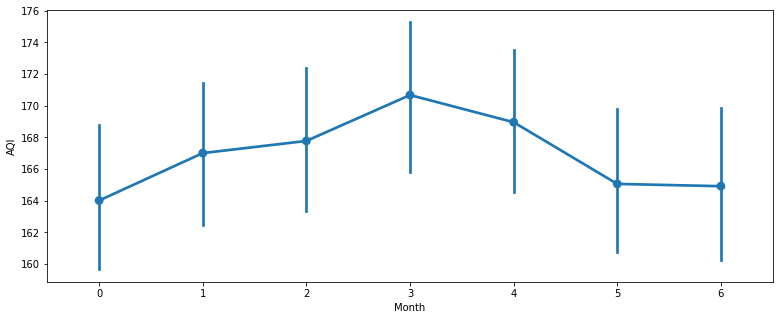

In [153]:
df1['Month'] = df1['Date'].dt.dayofweek # week
f,ax=plt.subplots(figsize=(13,5))
sns.pointplot(x='Month', y='AQI', data=df1)

Text(0.5, 0, 'Day of Year')

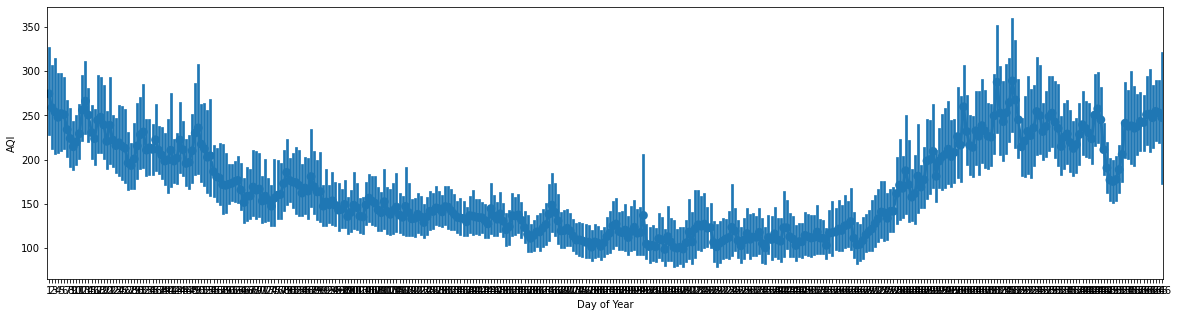

In [158]:
df1['Month'] = df1['Date'].dt.dayofyear # week
f,ax=plt.subplots(figsize=(20,5))
sns.pointplot(x='Month', y='AQI', data=df1)
plt.xlabel('Day of Year')

Text(0.5, 0, 'Quarter of Year')

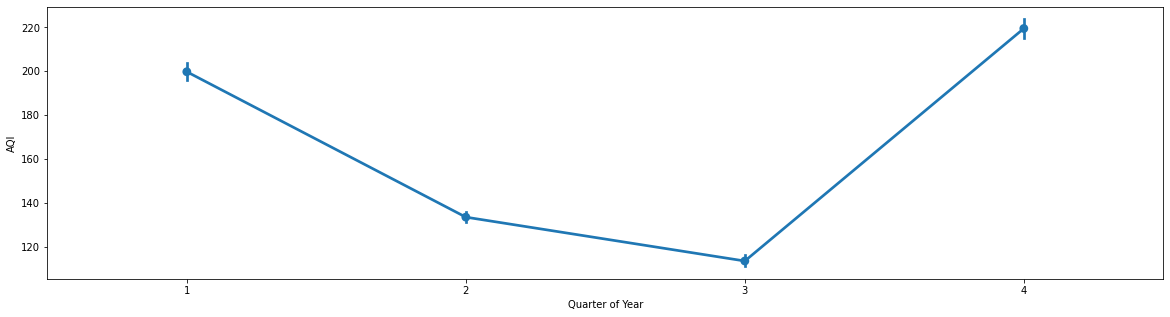

In [160]:
df1['Month'] = df1['Date'].dt.quarter # week
f,ax=plt.subplots(figsize=(20,5))
sns.pointplot(x='Month', y='AQI', data=df1)
plt.xlabel('Quarter of Year')

Text(0.5, 0, 'Day of Year')

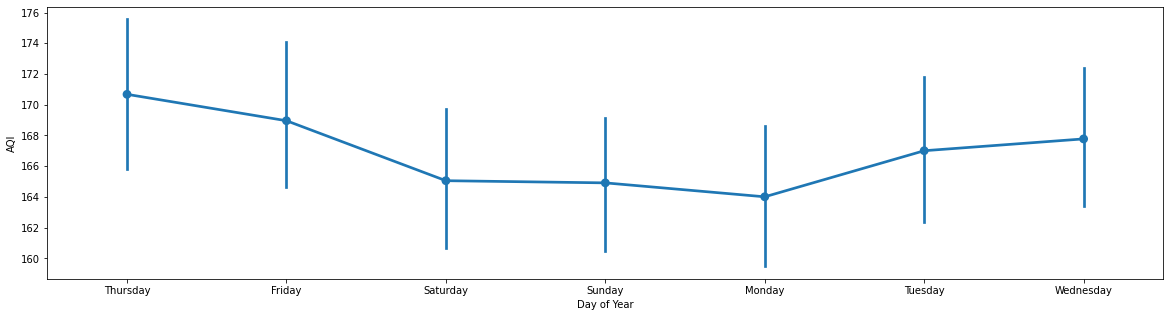

In [174]:
df1['Month'] = df1['Date'].dt.day_name() # week
f,ax=plt.subplots(figsize=(20,5))
sns.pointplot(x='Month', y='AQI', data=df1)
plt.xlabel('Day of Year')

Text(0.5, 0, 'Day of Year')

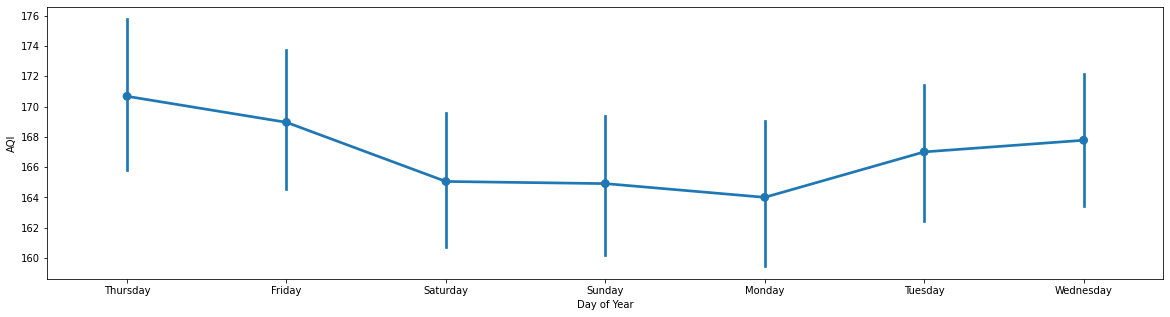

In [176]:
df1['Month'] = df1['Date'].dt.day_name() # week
f,ax=plt.subplots(figsize=(20,5))
sns.pointplot(x='Month', y='AQI', data=df1)
plt.xlabel('Day of Year')

In [214]:
cities=df1.groupby(['City'],as_index=False).mean()

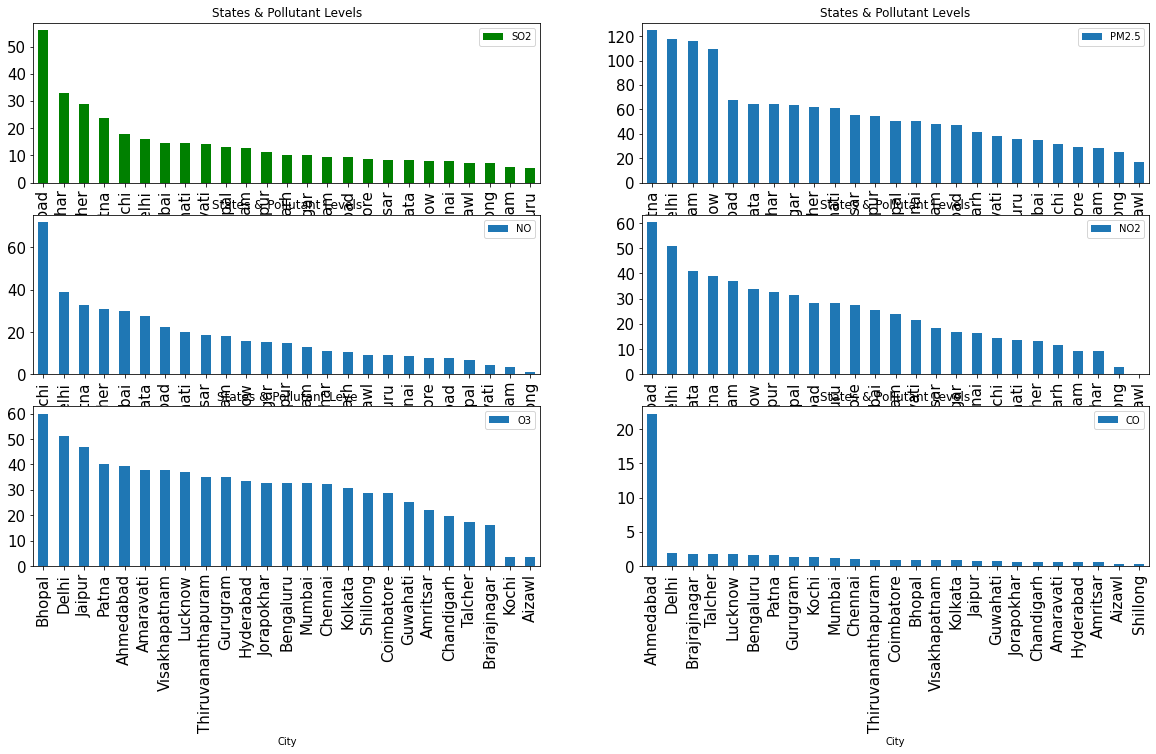

In [216]:
%matplotlib inline
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(40,40))
state_pollution = cities[['City','SO2']].groupby('City').mean()
state_pollution.reset_index(inplace = True)
state_pollution.sort_values('SO2', ascending= False, inplace = True)
state_pollution.plot(kind = 'bar', figsize= (20,10), x = 'City',  color='green', fontsize= 15, title = 'States & Pollutant Levels',ax=axes[0][0])


state_pollution2 = cities[['City','PM2.5']].groupby('City').mean()
state_pollution2.reset_index(inplace = True)
state_pollution2.sort_values('PM2.5', ascending= False, inplace = True)
state_pollution2.plot(kind = 'bar', figsize= (20,10), x = 'City', fontsize= 15, title = 'States & Pollutant Levels',ax=axes[0][1])

state_pollution2 = cities[['City','NO']].groupby('City').mean()
state_pollution2.reset_index(inplace = True)
state_pollution2.sort_values('NO', ascending= False, inplace = True)
state_pollution2.plot(kind = 'bar', figsize= (20,10), x = 'City', fontsize= 15, title = 'States & Pollutant Levels',ax=axes[1][0])

state_pollution2 = cities[['City','NO2']].groupby('City').mean()
state_pollution2.reset_index(inplace = True)
state_pollution2.sort_values('NO2', ascending= False, inplace = True)
state_pollution2.plot(kind = 'bar', figsize= (20,10), x = 'City', fontsize= 15, title = 'States & Pollutant Levels',ax=axes[1][1])

state_pollution2 = cities[['City','O3']].groupby('City').mean()
state_pollution2.reset_index(inplace = True)
state_pollution2.sort_values('O3', ascending= False, inplace = True)
state_pollution2.plot(kind = 'bar', figsize= (20,10), x = 'City', fontsize= 15, title = 'States & Pollutant Leve' ,ax=axes[2][0])

state_pollution2 = cities[['City','CO']].groupby('City').mean()
state_pollution2.reset_index(inplace = True)
state_pollution2.sort_values('CO', ascending= False, inplace = True)
state_pollution2.plot(kind = 'bar', figsize= (20,10), x = 'City', fontsize= 15, title = 'States & Pollutant Levels',ax=axes[2][1] )

In [217]:
df1.groupby('City')[['CO','NO','NO2','SO2','O3','PM2.5','AQI']].mean()

,CO,NO,NO2,SO2,O3,PM2.5,AQI
City,,,,,,,
Ahmedabad,22.191225,22.432606,60.338687,55.947901,39.220652,67.872368,452.122939
Aizawl,0.281441,9.408378,0.367027,7.348288,3.716840,16.989820,34.765766
Amaravati,0.614448,4.357974,21.720578,14.123076,38.009412,38.074906,95.299643
Amritsar,0.559268,18.833935,18.481745,8.276554,22.243256,55.129238,119.920959
Bengaluru,1.670103,9.361434,28.308589,5.255769,32.858721,35.870136,94.318325
Bhopal,0.880719,7.029460,31.373561,13.060432,59.824209,50.207230,132.827338
Brajrajnagar,1.837749,15.121485,16.950072,10.127661,16.053750,63.900497,150.280505
Chandigarh,0.630401,10.519752,11.717071,10.134615,19.933980,41.304592,96.498328
Chennai,1.019101,8.768685,16.549631,7.777794,32.357229,50.155230,114.502654


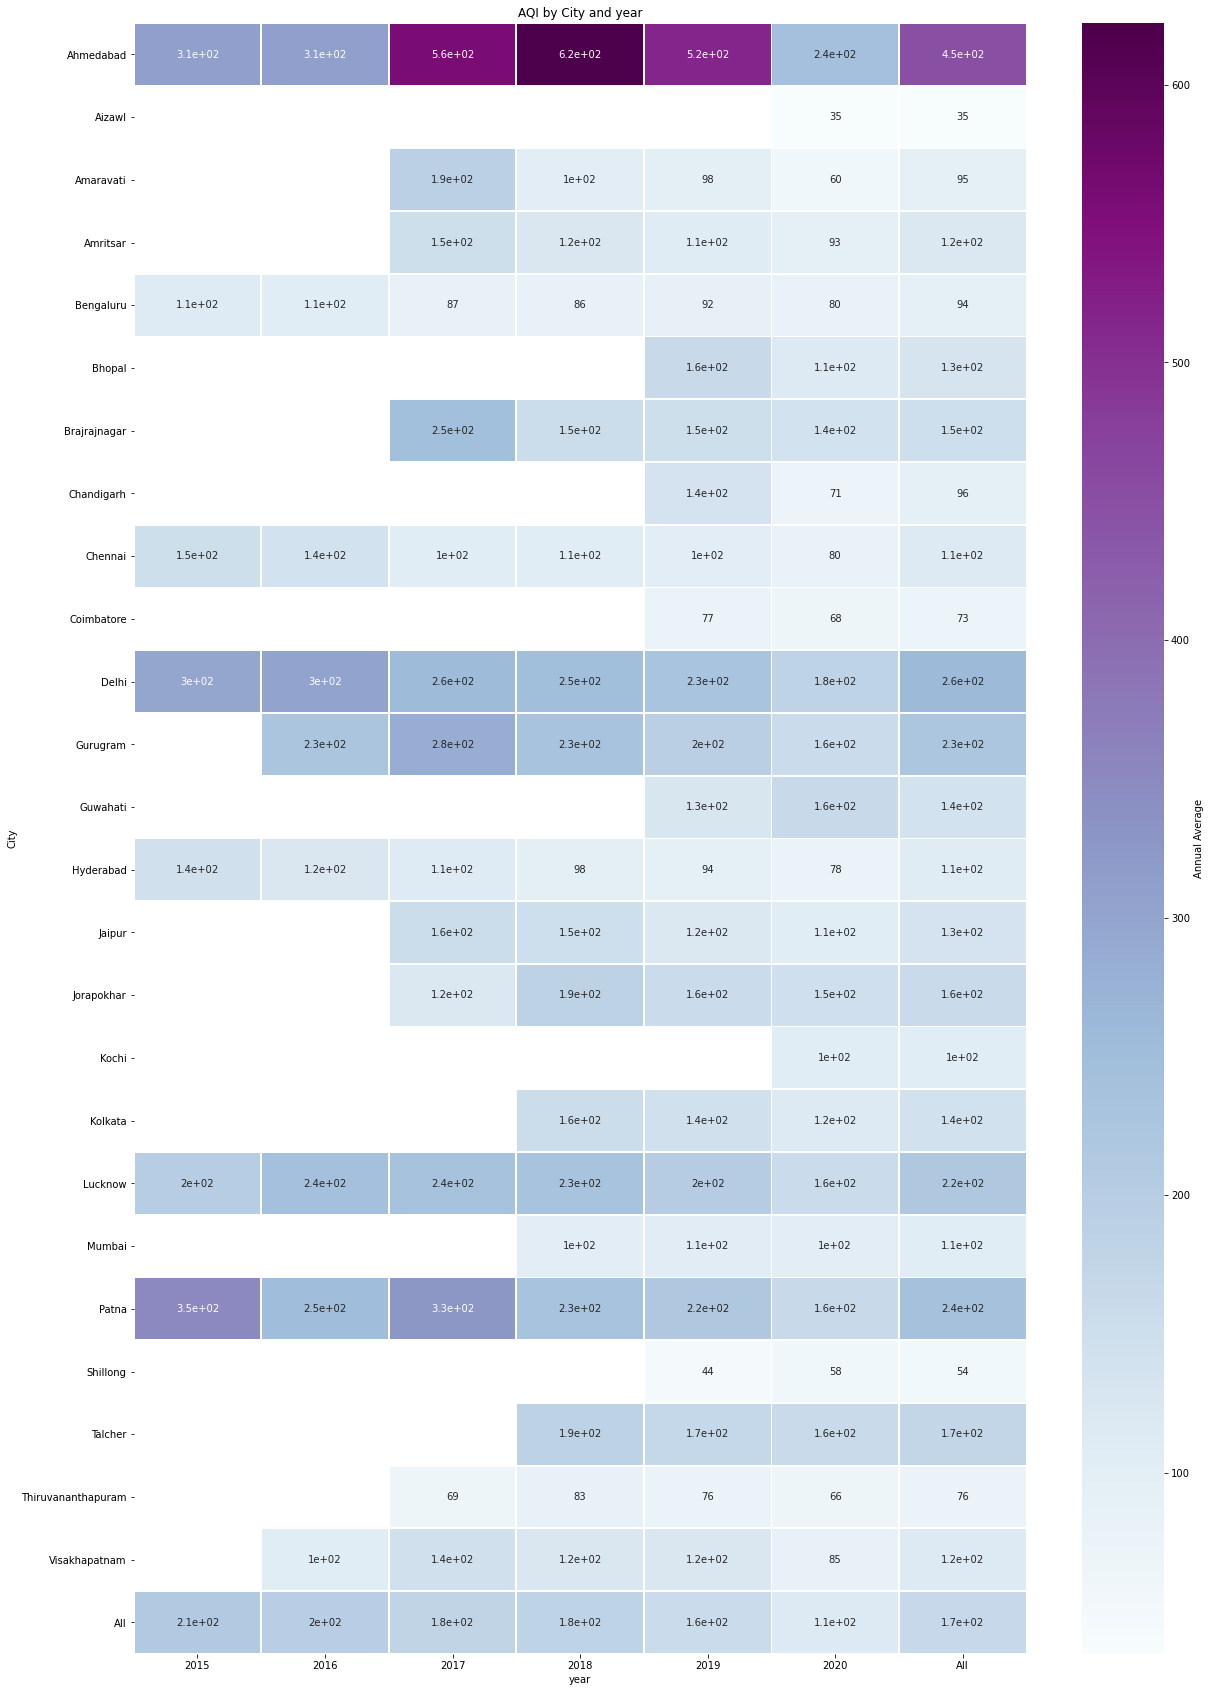

In [224]:
#Heatmap Pivot with State as Row, Year as Col, AQI as Value
df1['date'] = pd.to_datetime(df1['Date'],format='%Y-%m-%d') # date parse
df1['year'] = df1['Date'].dt.year # year
#df1['year'] = df1['year'].fillna(0.0).astype(int)
#dataset = dataset[(dataset['year']>0)]
f, ax = plt.subplots(figsize=(20,30))
ax.set_title('{} by City and year'.format('AQI'))
sns.heatmap(df1.pivot_table('AQI', index='City',
                columns=['year'],aggfunc='mean',margins=True),
                annot=True,cmap="BuPu", linewidths=.75, ax=ax,cbar_kws={'label': 'Annual Average'})

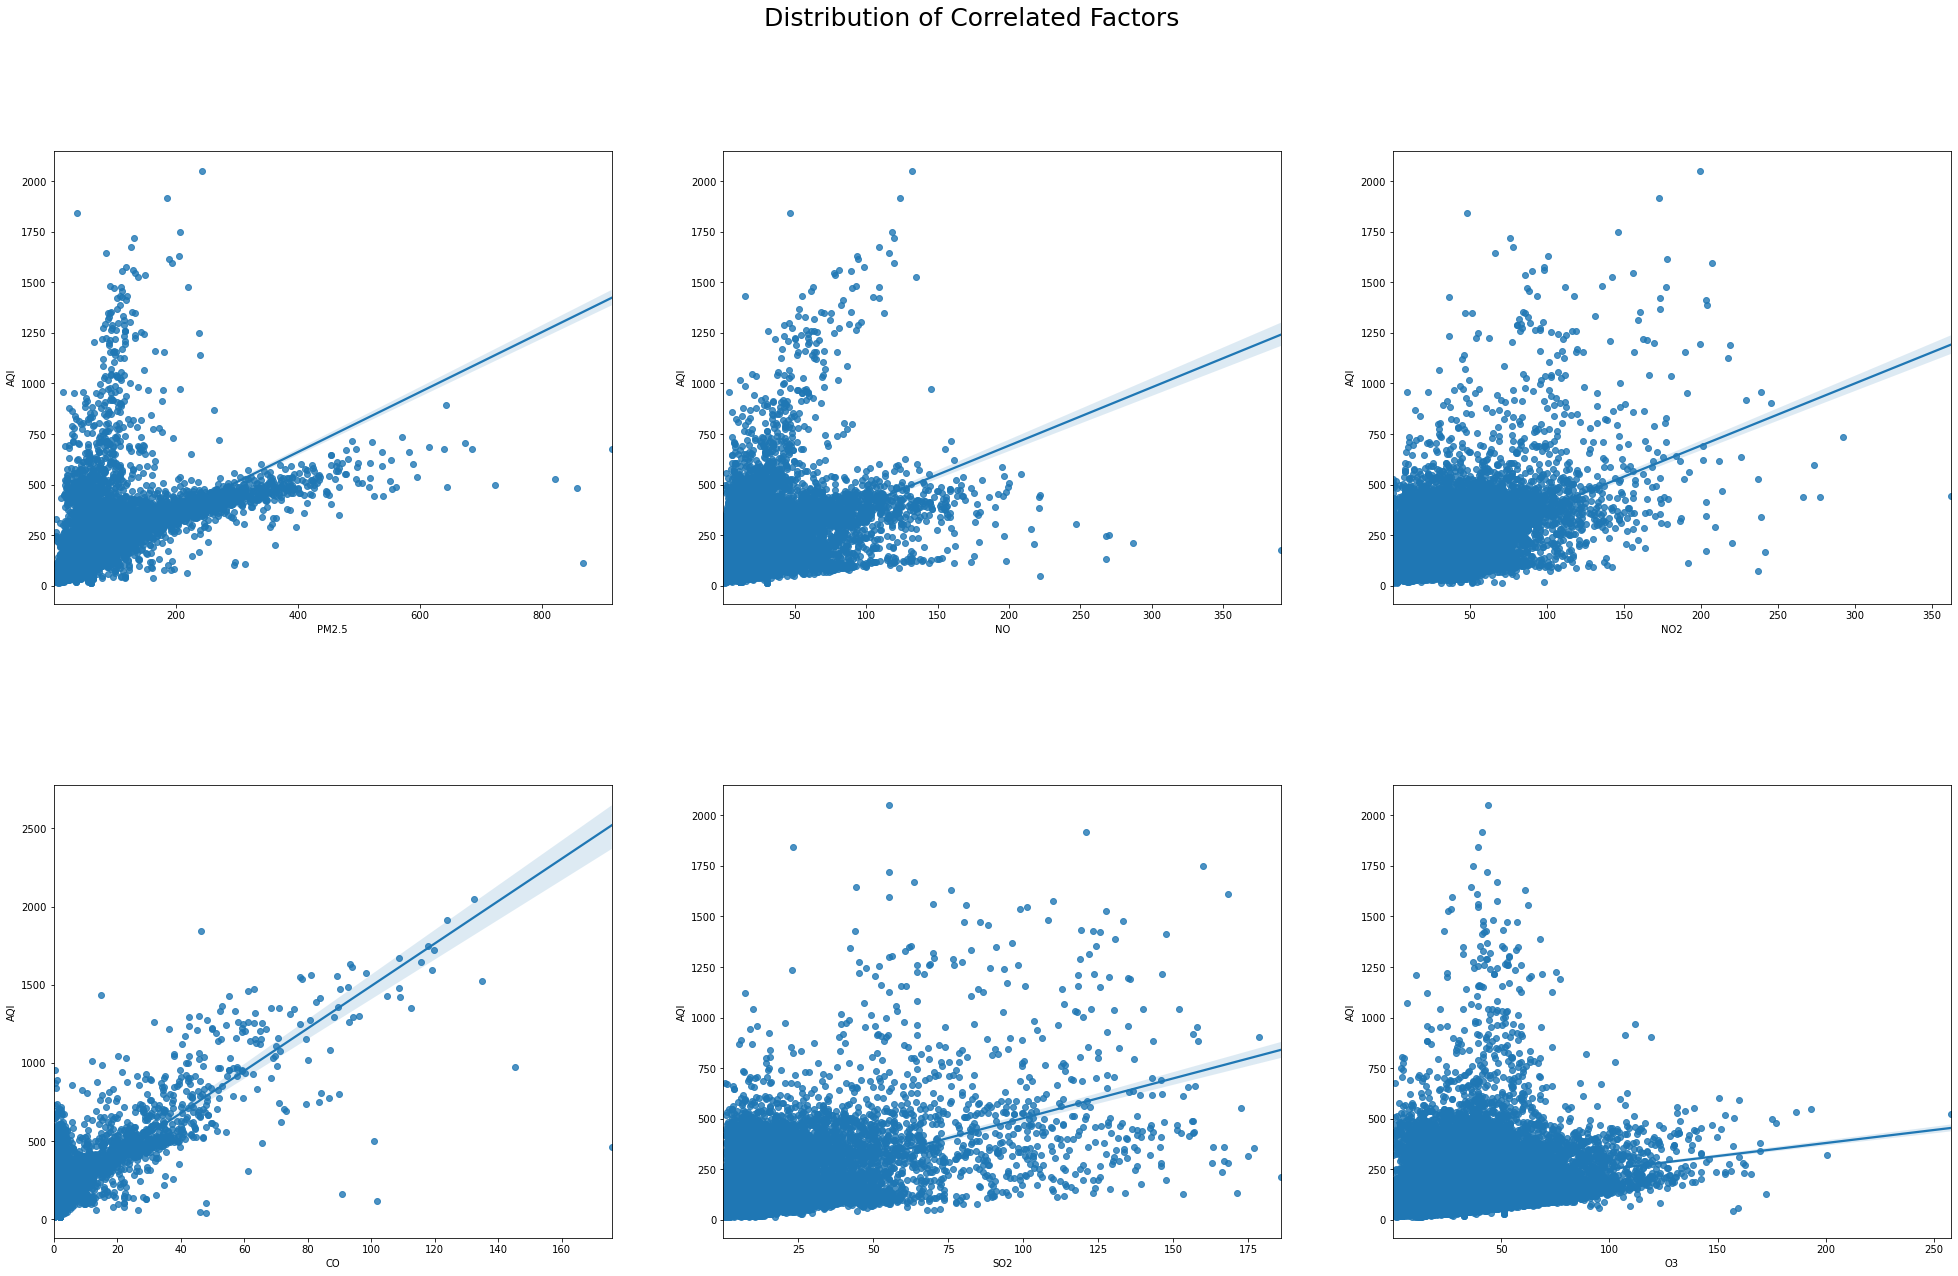

In [235]:
plt.rcParams['figure.figsize'] = (10, 7)
import warnings; warnings.simplefilter('ignore')

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(34,20))
plt.subplots_adjust(hspace=0.4)

z = pd.Series()
for col in df1.columns.values[3:15]:
    if ((col!='AQI')&(col!='City')&(col!='year')&(col!='Month')&(col!='week')&(col!='month')&(col!='date')):
      
        colums=np.array(df1[col])
        z[col]=colums
#p=z.loc[z.index]

for i in range(2):
    for j in range(3):
        
        #x=z.index.values[i*3+j]
        #sns.barplot(z.index[i*3+j],z.values[i*3+j])
        #x=z.index.values[i*3+j]
        
        y_label=z.index[i*3+j]
        x_label=z[i*3+j]
        
        sns.regplot(data=df1, x=z.index[i*3+j], y='AQI',ax=axes[i,j])


fig.suptitle('Distribution of Correlated Factors', fontsize='25')
plt.show()